### Configuração

In [35]:
# importando bibliotecas
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
# Extract 
PATH = "/data/processed/inmet_clean.csv"
df = pd.read_csv(PATH)

---

## 1° Vista

Reconhecendo os dados. 

---

In [4]:
# Conhecendo df
df.head()

,DATA,HORA_UTC,PRECIPITACAO_TOTAL,PRESSAO_ATM_EST,PRESSAO_MAX_1H,PRESSAO_MIN_1H,RADIACAO_GLOBAL,TEMPERATURA_BULBO_SECO,TEMPERATURA_PONTO_ORVALHO,TEMPERATURA_MAX_1H,TEMPERATURA_MIN_1H,ORVALHO_MAX_1H,ORVALHO_MIN_1H,UMIDADE_REL_MAX_1H,UMIDADE_REL_MIN_1H,UMIDADE_REL,VENTO_DIRECAO,VENTO_RAJADA_MAX,VENTO_VELOCIDADE
0,2023-02-15,0500 UTC,0.1,942.1,942.8,941.6,NaN,24.3,18.9,25.2,24.1,19.1,18.4,77.0,69.0,73.0,145.0,10.2,4.5
1,2023-02-15,0400 UTC,0.2,942.1,942.8,941.6,NaN,24.3,18.9,25.2,24.1,19.1,18.4,77.0,69.0,73.0,145.0,10.2,4.5
2,2023-02-15,0300 UTC,0.4,942.1,942.8,941.6,NaN,24.3,18.9,25.2,24.1,19.1,18.4,77.0,69.0,73.0,145.0,10.2,4.5
3,2023-01-01,0000 UTC,0.0,938.4,938.5,937.9,NaN,22.5,17.6,23.7,22.5,17.6,17.0,74.0,66.0,74.0,120.0,8.8,3.7
4,2023-01-01,0100 UTC,0.0,938.3,938.4,938.3,NaN,21.7,17.9,22.5,21.7,17.9,17.5,79.0,74.0,79.0,115.0,6.8,3.1


In [5]:
print(f"Temos {df.shape[0]} linhas e {df.shape[1]} colunas")

Temos 16383 linhas e 19 colunas


In [6]:
# Informação geral df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATA                       16383 non-null  object 
 1   HORA_UTC                   16383 non-null  object 
 2   PRECIPITACAO_TOTAL         16383 non-null  float64
 3   PRESSAO_ATM_EST            16383 non-null  float64
 4   PRESSAO_MAX_1H             16373 non-null  float64
 5   PRESSAO_MIN_1H             16373 non-null  float64
 6   RADIACAO_GLOBAL            8902 non-null   float64
 7   TEMPERATURA_BULBO_SECO     16383 non-null  float64
 8   TEMPERATURA_PONTO_ORVALHO  16383 non-null  float64
 9   TEMPERATURA_MAX_1H         16373 non-null  float64
 10  TEMPERATURA_MIN_1H         16373 non-null  float64
 11  ORVALHO_MAX_1H             16373 non-null  float64
 12  ORVALHO_MIN_1H             16373 non-null  float64
 13  UMIDADE_REL_MAX_1H         16373 non-null  flo

> **Valores de Data e Hora atuam quase como índices**, são os únicos valores que não possuem valores nulos. Apesar disso, é importante mencionar que **o tipo do dado está errado e precisa ser alterado para datetime**.

In [7]:
# Estatísticas básicas
df.describe()

,PRECIPITACAO_TOTAL,PRESSAO_ATM_EST,PRESSAO_MAX_1H,PRESSAO_MIN_1H,RADIACAO_GLOBAL,TEMPERATURA_BULBO_SECO,TEMPERATURA_PONTO_ORVALHO,TEMPERATURA_MAX_1H,TEMPERATURA_MIN_1H,ORVALHO_MAX_1H,ORVALHO_MIN_1H,UMIDADE_REL_MAX_1H,UMIDADE_REL_MIN_1H,UMIDADE_REL,VENTO_DIRECAO,VENTO_RAJADA_MAX,VENTO_VELOCIDADE
count,16383.000000,16383.000000,16373.000000,16373.000000,8902.000000,16383.000000,16383.000000,16373.000000,16373.000000,16373.000000,16373.000000,16373.000000,16373.000000,16383.000000,16279.000000,16235.000000,16277.000000
mean,0.080687,937.986999,938.239083,937.734129,1491.745810,23.690496,17.468370,24.395285,23.027063,17.949930,17.000586,73.953277,68.669334,71.357688,124.786719,7.056397,2.999816
std,0.676730,2.300075,2.277244,2.308065,1092.652562,4.225719,2.193028,4.482046,3.960246,2.115876,2.301981,17.429361,19.136409,18.369500,38.984880,2.319631,1.270834
min,0.000000,931.000000,931.100000,930.900000,0.000000,12.700000,2.600000,13.900000,12.500000,5.300000,-0.900000,14.000000,12.000000,14.000000,1.000000,0.000000,0.000000
25%,0.000000,936.300000,936.600000,936.100000,506.500000,20.500000,16.200000,20.900000,20.100000,16.700000,15.800000,63.000000,54.000000,58.000000,110.000000,5.500000,2.100000
50%,0.000000,937.900000,938.100000,937.600000,1420.300000,22.600000,17.700000,23.300000,22.100000,18.100000,17.300000,81.000000,76.000000,79.000000,119.000000,7.100000,3.000000
75%,0.000000,939.600000,939.800000,939.400000,2377.650000,26.600000,19.000000,27.700000,25.600000,19.400000,18.600000,88.000000,84.000000,86.000000,137.000000,8.600000,3.800000
max,25.200000,945.300000,945.300000,945.100000,4046.000000,37.200000,23.700000,37.900000,36.200000,24.000000,22.300000,97.000000,94.000000,96.000000,360.000000,18.000000,8.900000


> **A escala entre as variáveis divergem consideravelmente.** Isto serve como ponto de atenção ao escolhermos o **uso da padronização** a fim de evitar o enviesamento do nosso modelo.

In [8]:
# Duplicados
print(f"É dito que possuimos cerca de: {df.duplicated().sum()} valores duplicados")

# Quem são?
df[df.duplicated()].head()

É dito que possuimos cerca de: 0 valores duplicados


,DATA,HORA_UTC,PRECIPITACAO_TOTAL,PRESSAO_ATM_EST,PRESSAO_MAX_1H,PRESSAO_MIN_1H,RADIACAO_GLOBAL,TEMPERATURA_BULBO_SECO,TEMPERATURA_PONTO_ORVALHO,TEMPERATURA_MAX_1H,TEMPERATURA_MIN_1H,ORVALHO_MAX_1H,ORVALHO_MIN_1H,UMIDADE_REL_MAX_1H,UMIDADE_REL_MIN_1H,UMIDADE_REL,VENTO_DIRECAO,VENTO_RAJADA_MAX,VENTO_VELOCIDADE


> **Não possuimos valores duplicados**. Mesmo assim, ainda temos poucos dados, quanto pudermos trazer, melhor será. 

In [9]:
# Valores nulos
df.isna().sum()

DATA                            0
HORA_UTC                        0
PRECIPITACAO_TOTAL              0
PRESSAO_ATM_EST                 0
PRESSAO_MAX_1H                 10
PRESSAO_MIN_1H                 10
RADIACAO_GLOBAL              7481
TEMPERATURA_BULBO_SECO          0
TEMPERATURA_PONTO_ORVALHO       0
TEMPERATURA_MAX_1H             10
TEMPERATURA_MIN_1H             10
ORVALHO_MAX_1H                 10
ORVALHO_MIN_1H                 10
UMIDADE_REL_MAX_1H             10
UMIDADE_REL_MIN_1H             10
UMIDADE_REL                     0
VENTO_DIRECAO                 104
VENTO_RAJADA_MAX              148
VENTO_VELOCIDADE              106
dtype: int64

In [10]:
# Representação de valores nulos em porcentagem:
(df.isna().sum() / df.shape[0]) * 100

DATA                          0.000000
HORA_UTC                      0.000000
PRECIPITACAO_TOTAL            0.000000
PRESSAO_ATM_EST               0.000000
PRESSAO_MAX_1H                0.061039
PRESSAO_MIN_1H                0.061039
RADIACAO_GLOBAL              45.663187
TEMPERATURA_BULBO_SECO        0.000000
TEMPERATURA_PONTO_ORVALHO     0.000000
TEMPERATURA_MAX_1H            0.061039
TEMPERATURA_MIN_1H            0.061039
ORVALHO_MAX_1H                0.061039
ORVALHO_MIN_1H                0.061039
UMIDADE_REL_MAX_1H            0.061039
UMIDADE_REL_MIN_1H            0.061039
UMIDADE_REL                   0.000000
VENTO_DIRECAO                 0.634804
VENTO_RAJADA_MAX              0.903375
VENTO_VELOCIDADE              0.647012
dtype: float64

> A maior quantidade de valores nulos está **na "Radiação_global" temos cerca de 50% dos valores nulos.** É válido questionar se é válido ou não mantermos essa coluna.

#### Parsing DATA e HORA_UTC

Alterando tipo object para datetime.

In [11]:
# Tratando HORA_UTC
df["HORA_UTC"] = (
    df["HORA_UTC"]
    .str.replace(" UTC", "", regex=False)   
    .str.pad(4, fillchar="0")              
    .str.replace(r"(\d{2})(\d{2})", r"\1:\2", regex=True)  
)


In [12]:
# Convertendo para Datetime
df["DATA"] = pd.to_datetime(df["DATA"],
                            format= "%Y-%m-%d")

df["HORA_UTC"] = pd.to_datetime(df["HORA_UTC"].str.replace(" UTC", ":00"),
                                format= "%H:%M").dt.time

In [13]:
df[["DATA", "HORA_UTC"]].dtypes 

DATA        datetime64[ns]
HORA_UTC            object
dtype: object

> O HORA_UTC permanece como object, pois queremos apenas as horas (dt.time). Nesse caso, o retorno sempre é object. Se usássemos todo o formato de date, então teríamsos o datetime.

---

## Exploração

A análise exploratória será direcionada para entendermos correlações e aspectos da Precipitação Total.

#### Distribuição de Valores

In [14]:
# Reconhecendo a distribuição
df["PRECIPITACAO_TOTAL"].value_counts(normalize= True).head()

PRECIPITACAO_TOTAL
0.0    0.931575
0.2    0.025819
0.4    0.010865
0.6    0.006958
0.8    0.004212
Name: proportion, dtype: float64

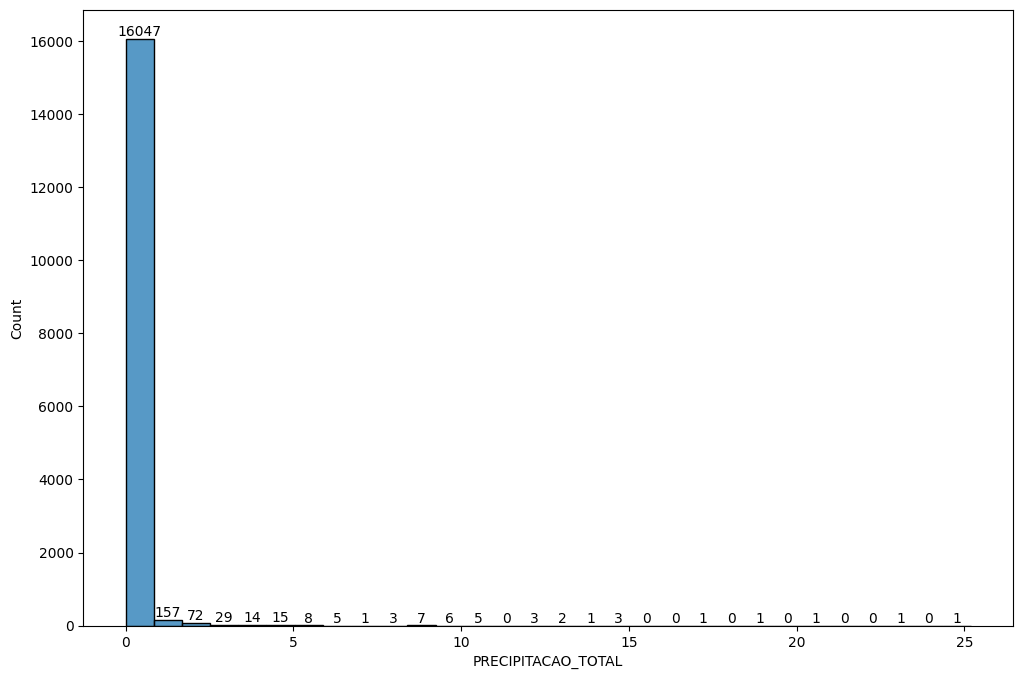

In [15]:
fig, ax = plt.subplots(figsize= (12, 8))

ax = sns.histplot(
    data= df,
    x= "PRECIPITACAO_TOTAL",
    bins= 30
)

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}', ha='center', va='bottom')

plt.show()

> **Associado à região (de sertão)** é condizente com a realidade esperada. **Chuvas são incomuns**, **mais de 93% das entradas captadas** pela estação metereológica **mostram a ausência de chuva.**

#### Correlação

<Axes: >

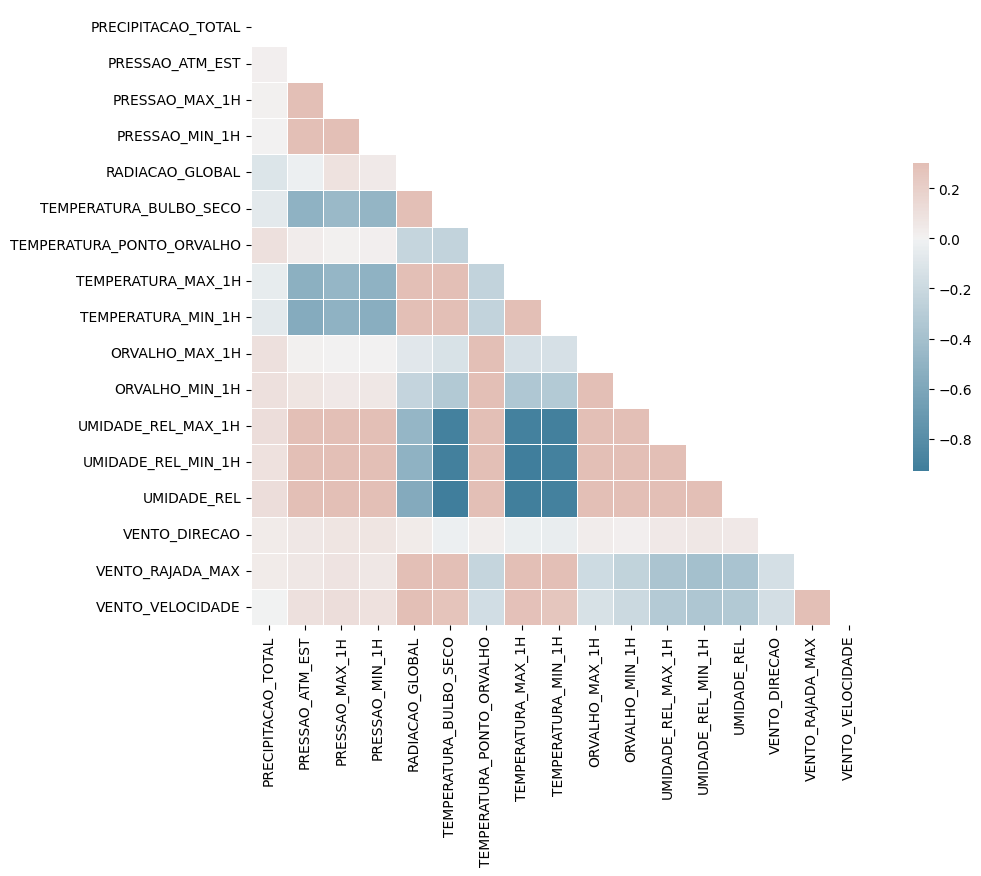

In [16]:
# Matriz de correlação
corr = df.iloc[:, 2:].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Figure
f, ax = plt.subplots(figsize=(12, 8))

# Colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plot
sns.heatmap(corr, mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

> É nítido que **há uma correação fraquíssima com qualquer outra variável** do nosso dataset. Entretanto, **isto pode ser um viés**, uma vez que **grande parte dos valores de preciptação total são iguais à zero.**

---

## Limpeza 

- Para variáveis numéricas com poucos nulos -> imputar mediana
- Para RADIACAO_GLOBAL (muitos nulos) -> imputar por mediana agrupada por hora
- Para colunas categóricas ou hora -> imputar moda

#### Lidando com valores numéricos

In [38]:
# Definindo as variáveis numéricas
numeric_cols = df.iloc[:, 2:].columns.to_list()

numeric_cols

['PRECIPITACAO_TOTAL',
 'PRESSAO_ATM_EST',
 'PRESSAO_MAX_1H',
 'PRESSAO_MIN_1H',
 'RADIACAO_GLOBAL',
 'TEMPERATURA_BULBO_SECO',
 'TEMPERATURA_PONTO_ORVALHO',
 'TEMPERATURA_MAX_1H',
 'TEMPERATURA_MIN_1H',
 'ORVALHO_MAX_1H',
 'ORVALHO_MIN_1H',
 'UMIDADE_REL_MAX_1H',
 'UMIDADE_REL_MIN_1H',
 'UMIDADE_REL',
 'VENTO_DIRECAO',
 'VENTO_RAJADA_MAX',
 'VENTO_VELOCIDADE']

In [32]:
# Imputar RADIACAO_GLOBAL por mediana
med_por_hora = df.groupby('HORA_UTC')['RADIACAO_GLOBAL'].median()

df['RADIACAO_GLOBAL'] = df['RADIACAO_GLOBAL'].fillna(df['HORA_UTC'].map(med_por_hora))

# Conferindo se ainda há nulos
df['RADIACAO_GLOBAL'].isna().sum()

np.int64(0)

> Não temos mais valores nulos para a radiação global. A **imputação de valores com a mediana é uma solução lógica**, já que é um valor que **muda drasticamente de acordo com o horário**.

In [39]:
# Para as outras colunas numéricas, já que temos poucos valores nulos, vamos apenas preencher com a mediana.
imputer = SimpleImputer(strategy='median')

df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Conferindo o resultado
df.isna().sum()

DATA                         0
HORA_UTC                     0
PRECIPITACAO_TOTAL           0
PRESSAO_ATM_EST              0
PRESSAO_MAX_1H               0
PRESSAO_MIN_1H               0
RADIACAO_GLOBAL              0
TEMPERATURA_BULBO_SECO       0
TEMPERATURA_PONTO_ORVALHO    0
TEMPERATURA_MAX_1H           0
TEMPERATURA_MIN_1H           0
ORVALHO_MAX_1H               0
ORVALHO_MIN_1H               0
UMIDADE_REL_MAX_1H           0
UMIDADE_REL_MIN_1H           0
UMIDADE_REL                  0
VENTO_DIRECAO                0
VENTO_RAJADA_MAX             0
VENTO_VELOCIDADE             0
dtype: int64

> Agora temos todas as colunas preechidas.

---

## Feature Engineering 


#### 1) Classificação da precipitação da chuva 

In [42]:
# Como a preciptação da chuva é um problema que pode ser resolvido por métricas já definidas, iremos apenas usar seus intervalos
bins = [-np.inf, 5.0, 25.0, 50.0, np.inf]

labels = ['chuva_fraca', 'chuva_moderada', 'chuva_forte', 'chuva_muito_forte']

df['NIVEL_PRECIPITACAO'] = pd.cut(df['PRECIPITACAO_TOTAL'], 
                            bins=bins, 
                            labels=labels,
                            right=True)

df['NIVEL_PRECIPITACAO'].value_counts()

NIVEL_PRECIPITACAO
chuva_fraca          16334
chuva_moderada          48
chuva_forte              1
chuva_muito_forte        0
Name: count, dtype: int64

> Além do histograma acima, aqui só confirmamos ainda mais **o quão desbalanceado é este conjunto de dados quando estamos lidando com precipitação, ao menos nesta região de pernambuco**.

---

## Feature Selection 


#### Definindo colunas

Como estaremos utilizando o Kmeans, vamos usar apeans colunas numéricas. Nivel de precipitação também não entra, mas servirá para distinguirmos os grupos posteriormente.

In [58]:
# Escolhendo as features para o modelo
exclude = ['DATA', 'HORA_UTC', 'NIVEL_PRECIPITACAO']

features = df.columns[~df.columns.isin(exclude)]

In [59]:
# Conhecendo nosso X
X = df[features].copy()

## Padronização

Definimos o uso do StandardScaler como uma baseline. É possível fazermos, através do método da silhueta, outras avaliações de qual normal de padronização ou normalização seja mais eficiente para nosso caso.

In [64]:
# Padronizando
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [71]:
X_scaled_df = pd.DataFrame(X_scaled, columns= features)

In [73]:
# Conferindo
X_scaled_df.head()

,PRECIPITACAO_TOTAL,PRESSAO_ATM_EST,PRESSAO_MAX_1H,PRESSAO_MIN_1H,RADIACAO_GLOBAL,TEMPERATURA_BULBO_SECO,TEMPERATURA_PONTO_ORVALHO,TEMPERATURA_MAX_1H,TEMPERATURA_MIN_1H,ORVALHO_MAX_1H,ORVALHO_MIN_1H,UMIDADE_REL_MAX_1H,UMIDADE_REL_MIN_1H,UMIDADE_REL,VENTO_DIRECAO,VENTO_RAJADA_MAX,VENTO_VELOCIDADE
0,0.028539,1.788258,2.003531,1.675537,-0.739584,0.144241,0.652830,0.179748,0.271156,0.543682,0.608039,0.174607,0.017051,0.089407,0.521069,1.361249,1.184345
1,0.176313,1.788258,2.003531,1.675537,-0.739813,0.144241,0.652830,0.179748,0.271156,0.543682,0.608039,0.174607,0.017051,0.089407,0.521069,1.361249,1.184345
2,0.471861,1.788258,2.003531,1.675537,-0.739676,0.144241,0.652830,0.179748,0.271156,0.543682,0.608039,0.174607,0.017051,0.089407,0.521069,1.361249,1.184345
3,-0.119235,0.179565,0.114652,0.071925,-0.739676,-0.281735,0.060024,-0.155027,-0.132988,-0.165482,-0.000334,0.002435,-0.139764,0.143847,-0.122226,0.754943,0.552771
4,-0.119235,0.136087,0.070724,0.245289,-0.739904,-0.471058,0.196825,-0.422847,-0.335060,-0.023649,0.216942,0.289389,0.278409,0.416045,-0.250884,-0.111210,0.079091


In [75]:
# Conferindo
X_scaled_df.describe()

,PRECIPITACAO_TOTAL,PRESSAO_ATM_EST,PRESSAO_MAX_1H,PRESSAO_MIN_1H,RADIACAO_GLOBAL,TEMPERATURA_BULBO_SECO,TEMPERATURA_PONTO_ORVALHO,TEMPERATURA_MAX_1H,TEMPERATURA_MIN_1H,ORVALHO_MAX_1H,ORVALHO_MIN_1H,UMIDADE_REL_MAX_1H,UMIDADE_REL_MIN_1H,UMIDADE_REL,VENTO_DIRECAO,VENTO_RAJADA_MAX,VENTO_VELOCIDADE
count,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,1.638300e+04,16383.000000,1.638300e+04,1.638300e+04
mean,1.821571e-17,-1.498893e-15,2.380186e-14,1.310143e-14,8.847630e-17,-1.665436e-16,-1.304592e-15,2.047099e-16,-8.084305e-16,-6.522958e-16,7.008711e-16,2.879817e-16,-9.021113e-17,-2.012402e-16,0.000000,-4.163590e-16,-3.469659e-17
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031,1.000031e+00,1.000031e+00
min,-1.192349e-01,-3.037820e+00,-3.135978e+00,-2.961934e+00,-7.399494e-01,-2.600938e+00,-6.780043e+00,-2.342223e+00,-2.658889e+00,-5.980621e+00,-7.778816e+00,-3.441017e+00,-2.962432e+00,-3.122537e+00,-3.184306,-3.056128e+00,-2.368256e+00
25%,-1.192349e-01,-7.334763e-01,-7.199696e-01,-7.082101e-01,-7.397669e-01,-7.550417e-01,-5.783822e-01,-7.799399e-01,-7.392042e-01,-5.909796e-01,-5.217967e-01,-6.288648e-01,-7.670237e-01,-7.271889e-01,-0.379543,-6.309013e-01,-7.103757e-01
50%,-1.192349e-01,-3.782546e-02,-6.105814e-02,-5.809732e-02,-7.150367e-01,-2.580696e-01,1.056245e-01,-2.443000e-01,-2.340240e-01,7.090624e-02,1.300314e-01,4.041706e-01,3.829519e-01,4.160454e-01,-0.147957,1.871297e-02,1.445645e-04
75%,-1.192349e-01,7.013035e-01,6.857082e-01,7.220380e-01,6.883787e-01,6.885438e-01,6.984302e-01,7.265471e-01,6.500414e-01,6.855145e-01,6.949491e-01,8.059066e-01,8.011248e-01,7.971234e-01,0.289483,6.683273e-01,6.317182e-01
max,3.711982e+01,3.179560e+00,3.101717e+00,3.192466e+00,2.952241e+00,3.197069e+00,2.841651e+00,3.014175e+00,3.327497e+00,2.860282e+00,2.302792e+00,1.322424e+00,1.323841e+00,1.341521e+00,6.053399,4.739243e+00,4.658000e+00


> Aqui conseguimos conferir que temos todos os dados padronizados... média muito próxima de zero e desvio padrão próximo de 1.

---

## Modelagem


#### Definindo k ideal


In [78]:
inertia = []
silhueta_score = []

K_range = range(2,7)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    
    inert = km.inertia_
    sil = silhouette_score(X_scaled, labels)
    
    inertia.append(inert)
    silhueta_score.append(sil)
    
    print("==="*9)
    print(f"K = {k}")
    print(f"Inertia: {inert:.2f}")
    print(f"Silhouette Score: {sil:.4f}")


K = 2
Inertia: 182224.52
Silhouette Score: 0.3606
K = 3
Inertia: 153318.60
Silhouette Score: 0.2342
K = 4
Inertia: 133543.01
Silhouette Score: 0.2247
K = 5
Inertia: 122324.31
Silhouette Score: 0.2283
K = 6
Inertia: 112499.43
Silhouette Score: 0.2178


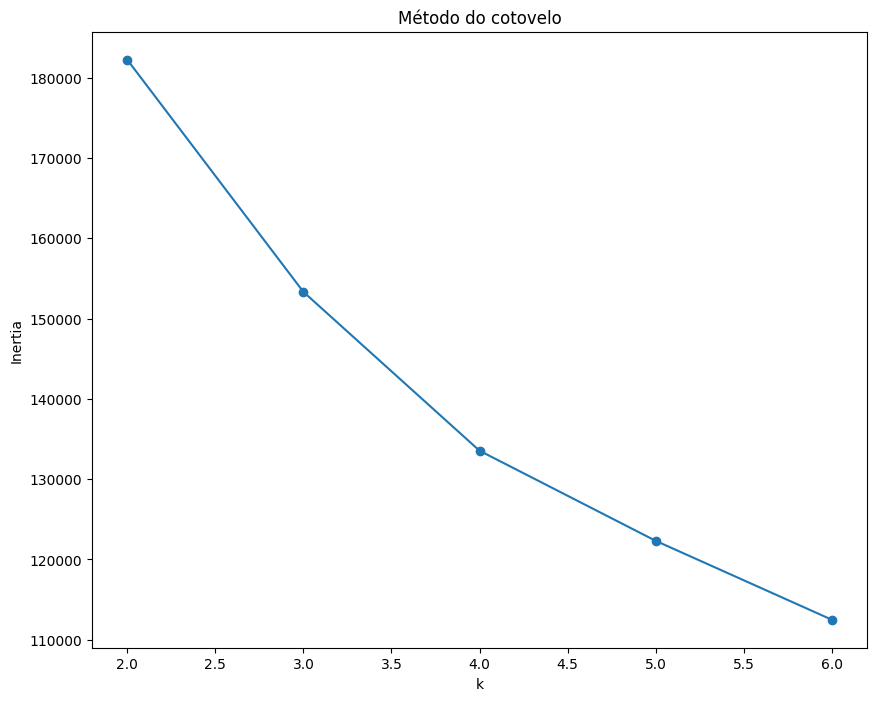

In [89]:
plt.figure(figsize= (10, 8))

plt.plot(list(K_range), inertia, '-o')

plt.xlabel('k')
plt.ylabel('Inertia')

plt.title('Método do cotovelo')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

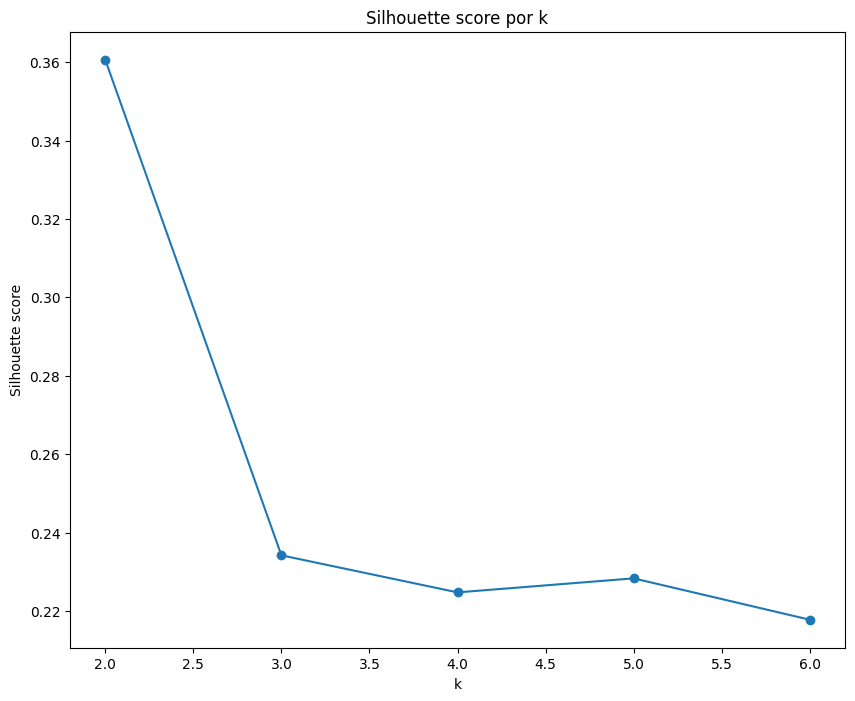

In [88]:
plt.figure(figsize=(10, 8))

plt.plot(list(K_range), silhueta_score, '-o')

plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.title('Silhouette score por k')
plt.show

> **Uma possível explicação que podemos levantar para o baixo desempenho dos agrupamentos é a distribuição da variável de precipitação**: onde **aproximadamente 93% dos dados apresentam 0 mm de chuva.** Isso faz com que a maior parte dos dados corresponda a situações de clima seco, com pouca variabilidade entre os pontos.
>
> Como **o KMeans depende de diferenças numéricas para separar grupos, essa concentração massiva em um único valor reduz a capacidade do algoritmo** de identificar padrões meteorológicos distintos.
>
> Como os resultados silhueta revalram valores muito baixos, vamos utilizar o K como 2. Talvez, por utilziarmos o K como 2, teremos um resultado melhor, mas, provavelmente, teremos um insight mais simplório, como: chuva x não chuva.

---

## Utilizando o MLflow


In [93]:
# Configuração base
mlflow_backend_uri = os.getenv('MLFLOW_BACKEND_URI')

if mlflow_backend_uri:
    mlflow.set_tracking_uri(mlflow_backend_uri)

mlflow.set_experiment("precipitacao_kmeans")

2025/12/04 02:23:27 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/04 02:23:27 INFO mlflow.store.db.utils: Updating database tables
2025-12-04 02:23:27 INFO  [alembic.runtime.migration] Context impl MySQLImpl.
2025-12-04 02:23:27 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025-12-04 02:23:27 INFO  [alembic.runtime.migration] Context impl MySQLImpl.
2025-12-04 02:23:27 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025/12/04 02:23:27 INFO mlflow.tracking.fluent: Experiment with name 'precipitacao_kmeans' does not exist. Creating a new experiment.


<Experiment: artifact_location='/home/jovyan/work/mlruns/1', creation_time=1764815007785, experiment_id='1', last_update_time=1764815007785, lifecycle_stage='active', name='precipitacao_kmeans', tags={}>

In [94]:
k = K_range[np.argmax(silhueta_score)]

# Kmeans com K = 2
with mlflow.start_run(run_name=f'kmeans_k{k}'):
    mlflow.log_param('features', features)
    mlflow.log_param('scaler', 'StandardScaler')
    mlflow.log_param('k', int(k))
    
    kmeans = KMeans(n_clusters=int(k), random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    df['CLUSTER'] = cluster_labels
    
    sil = silhouette_score(X_scaled, cluster_labels)
    mlflow.log_metric('silhouette', float(sil))
    mlflow.log_metric('inertia', float(kmeans.inertia_))
    
    # Métricas por cluster: média de precipitação
    cluster_stats = df.groupby('CLUSTER')['PRECIPITACAO_TOTAL'].agg(['count','mean','median','std']).reset_index()
    print('\nEstatísticas precipitação por cluster:\n', cluster_stats)
    
    mlflow.sklearn.log_model(kmeans, name= 'kmeans_model')

2025/12/04 02:23:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



Estatísticas precipitação por cluster:
    CLUSTER  count      mean  median       std
0        0  11714  0.112182     0.0  0.797663
1        1   4669  0.001671     0.0  0.043877


2025/12/04 02:23:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


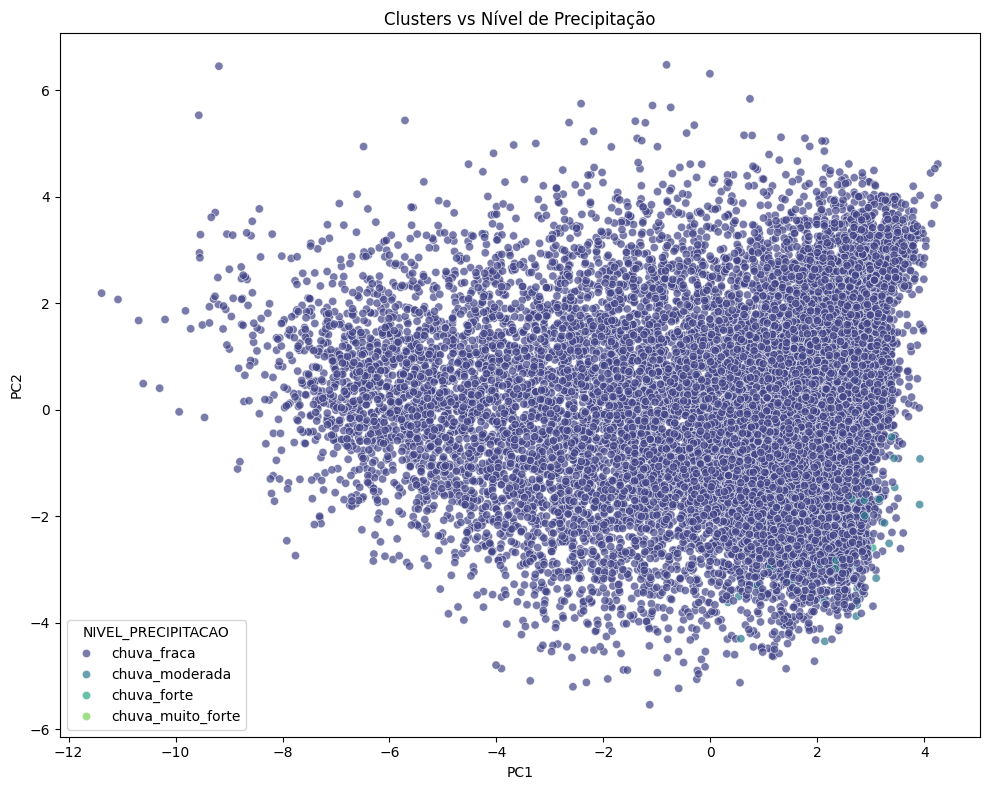

In [98]:
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
df['PC1'] = pcs[:,0]
df['PC2'] = pcs[:,1]

plt.figure(figsize=(10,8))

sns.scatterplot(
    x='PC1', 
    y='PC2',
    data=df,
    hue='NIVEL_PRECIPITACAO',
    palette='viridis',
    alpha=0.7
)

plt.title('Clusters vs Nível de Precipitação')

plt.tight_layout()
plt.show()


---

## Conclusão

> Com o gráfico podemos ver que praticamente todo o espaço gerado pela PCA é ocupado pela classe “chuva_fraca”, o que reflete o desbalanceamento da variável PRECIPITACAO_TOTAL, mais de 93% dos registros não apresentam chuva ou apresentam valores muito baixos.
> 
> Como consequência, o KMeans não consegue aprender padrões distintos relacionados à precipitação, pois **a variabilidade climática (chuva moderada, forte e muito forte) representa é muito pequena do dataset.** Os poucos pontos com maior precipitação aparecem dispersos e sem uma estrutura clara, o que contribuiu para os baixos valores do índice de silhueta.
> 
> Portanto, concluímos que a separação dos clusters provavelmente **foi influenciada majoritariamente pelo desbalanceamento dos dados.** Para análises com foco em precipitação, seria necessário:
> - Reduzir o desbalanceamento (ex.: oversampling das chuvas fortes)
> - Filtrar períodos com maior variabilidade de chuva